In [2]:
from simuPark.park import DisneyPark
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd
import scipy.stats as st

x = np.linspace(0, 16, 16*60)
k = 5
fn = lambda x, k:  (((0.631012633902875 * ((x+1) ** 0 ) + 0.141641794969108 * ((x+1) ** 1 ) + 1.08320562754808 * ((x+1) ** 2 ) + -0.386896805430061 * ((x+1) ** 3 ) + 0.0645561077512354 * ((x+1) ** 4 ) + -0.00580069833046977 * ((x+1) ** 5 ) + 0.000263776181717327 * ((x+1) ** 6 ) + -4.72376212119374e-06 * ((x+1) ** 7 ))) / 10)

guest_data = []
column_name = [
    'Archetype',
    'arrival_time',
    'departure_time',
    'time_in_park',
    'max_wait',
    'attractions_experienced',
    'total_wait_time',
    'average_wait_time',
    ]

for i in range(7):

    park = DisneyPark(
        fn = fn,
        fastpass_pool_size=0.3,
    )

    park.start_day(max_entry_rate=95000/960, wait_time_update=5)

    for guest in park.guests:
        current_guest = []

        current_guest.append(guest.archetype)
        current_guest.append(guest.arrival_time)
        current_guest.append(guest.departure_time)
        current_guest.append(guest.departure_time - guest.arrival_time)
        current_guest.append(guest.max_wait)
        current_guest.append(guest.attractions_experienced)
        current_guest.append(guest.total_wait_time)
        if guest.attractions_experienced == 0:
            current_guest.append(0)
        else: 
            current_guest.append(guest.total_wait_time / guest.attractions_experienced)

        guest_data.append(current_guest)

guest_df = pd.DataFrame(guest_data, columns=column_name)
guest_df.to_csv(r'./datasets/DFP.csv')



Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:21<00:00, 44.85it/s] 


Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:22<00:00, 43.09it/s] 


Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:22<00:00, 42.63it/s] 


Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:24<00:00, 39.50it/s] 


Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:24<00:00, 39.27it/s] 

Generating Entry Events...


Entry Events Generated



100%|██████████| 960/960 [00:22<00:00, 41.79it/s] 


Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:23<00:00, 40.91it/s] 


38760
['Walk15', 'Walk10', 'ShopGifts', 'EatRestaurant', 'BathroomBreak', 'TakePictures']
['DINOSAUR', 'Expedition Everest', 'Flight of Passage', 'Kali River Rapids', 'Kilimanjaro Safaris', "Na'vi River Journey", 'TriceraTop Spin']
['Tourist', 'Average', 'Activity Enjoyer', 'Attraction Enjoyer', 'All Day Park', 'Relaxed Visitor']


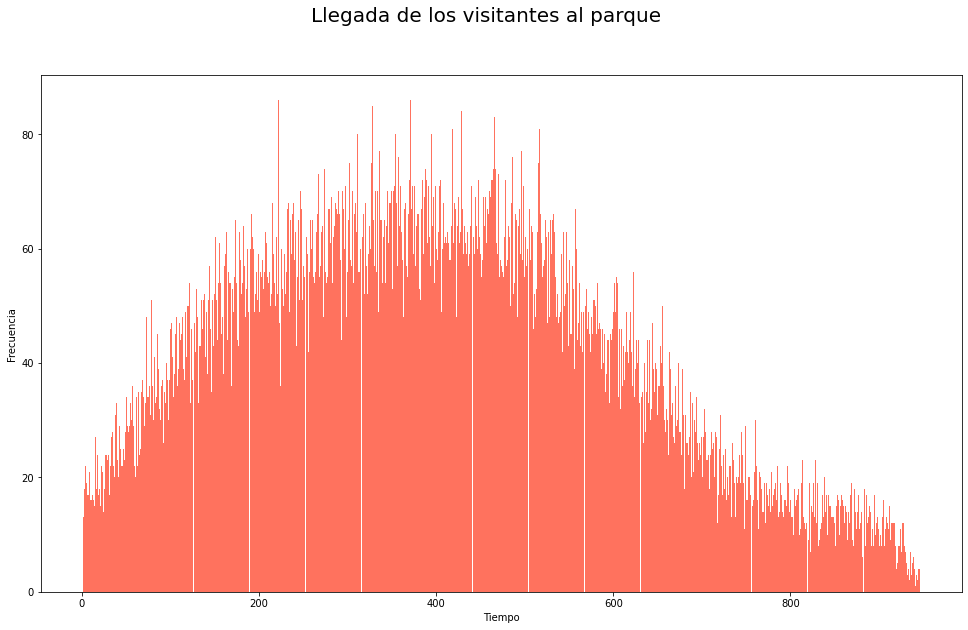

In [2]:
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd

print(len(park.guests))

y = [guest.arrival_time for guest in park.guests]

fig = figure()
fig.set_size_inches(16.5, 9.5)
hist(y, color="#ff725e", bins=960);
fig.suptitle('Llegada de los visitantes al parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')


print([i.name for i in park.activities])
print([i.name for i in park.attractions])
print([i.name for i in park.guest_archetypes])

In [11]:
guest_data = []
column_name = [
    'Archetype',
    'arrival_time',
    'departure_time',
    'time_in_park',
    'max_wait',
    'attractions_experienced',
    'fastpass_used',
    'total_wait_time',
    'average_wait_time',
    ]

for guest in park.guests:
    current_guest = []

    current_guest.append(guest.archetype)
    current_guest.append(guest.arrival_time)
    current_guest.append(guest.departure_time)
    current_guest.append(guest.departure_time - guest.arrival_time)
    current_guest.append(guest.max_wait)
    current_guest.append(guest.attractions_experienced)
    current_guest.append(guest.fastpass_used)
    current_guest.append(guest.total_wait_time)
    if guest.attractions_experienced == 0:
        current_guest.append(0)
    else: 
        current_guest.append(guest.total_wait_time / guest.attractions_experienced)

    guest_data.append(current_guest)

guest_df = pd.DataFrame(guest_data, columns=column_name)
guest_df.to_csv(r'./datasets/DFP.csv')
guest_df

,Archetype,arrival_time,departure_time,time_in_park,max_wait,attractions_experienced,fastpass_used,total_wait_time,average_wait_time
0,Relaxed Visitor,1,341,340,25,3,0,26,8.666667
1,Activity Enjoyer,1,271,270,10,1,0,3,3.000000
2,Attraction Enjoyer,1,525,524,70,17,2,230,13.529412
3,Attraction Enjoyer,1,385,384,70,13,1,126,9.692308
4,Activity Enjoyer,1,226,225,10,3,0,6,2.000000
...,...,...,...,...,...,...,...,...,...
38755,All Day Park,945,960,15,40,0,0,6,0.000000
38756,All Day Park,946,960,14,40,0,0,0,0.000000
38757,Average,946,960,14,50,0,0,13,0.000000
38758,All Day Park,946,960,14,40,0,0,13,0.000000


Atracciones experimentadas promedio: 3.6090299277605777
Atracciones experimentadas desviación estandar: 2.8589531284804925


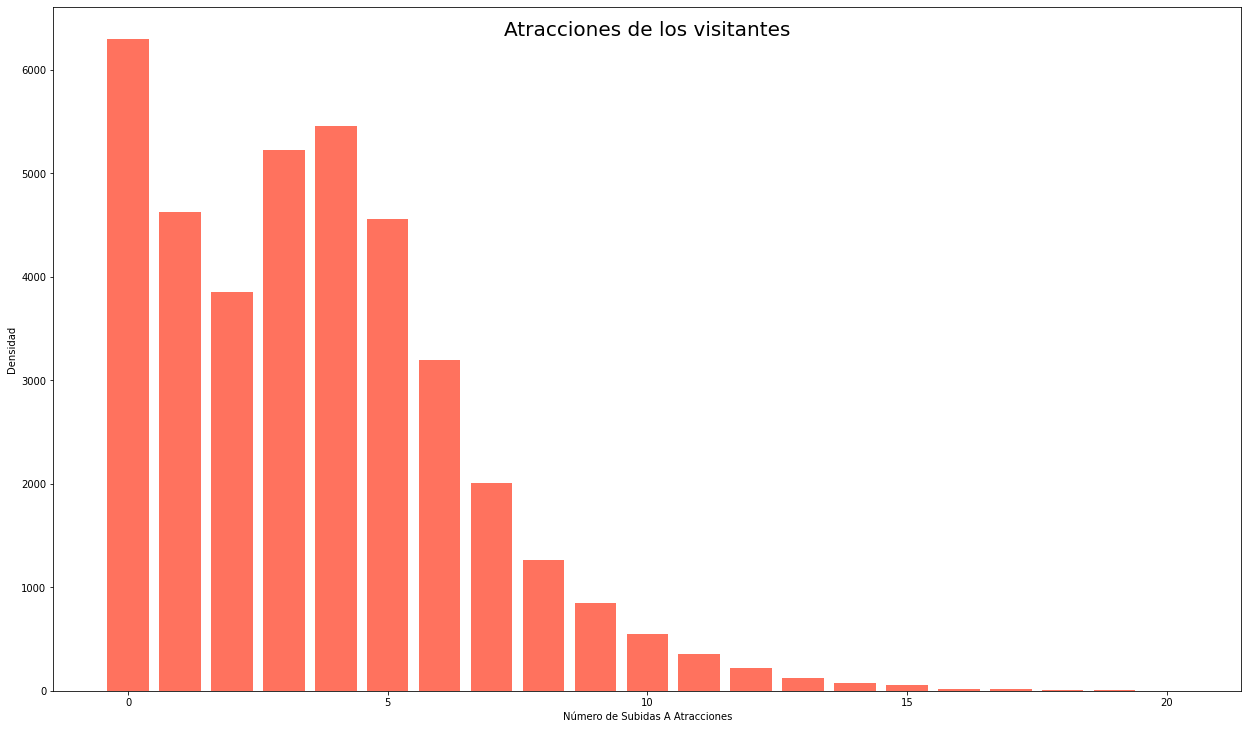

In [4]:
heights = [0 for _ in range(np.max(guest_df['attractions_experienced'])+1)]
labels = [i for i in range(np.max(guest_df['attractions_experienced'])+1)]
attrExp = [guest.attractions_experienced for guest in park.guests]

for guest in park.guests:
    heights[guest.attractions_experienced] += 1

fig = figure()
fig.set_size_inches(16.5, 9.5)
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, heights, color="#ff725e");
fig.suptitle('Atracciones de los visitantes', fontsize = 20)
xlabel('Número de Subidas A Atracciones')
ylabel('Densidad')

print(f'Atracciones experimentadas promedio: {np.mean(attrExp)}')
print(f'Atracciones experimentadas desviación estandar: {np.std(attrExp)}')

37.39544415748478
(37.38795050485449, 37.40293781011508)
32465
133.0


Text(0, 0.5, 'Densidad')

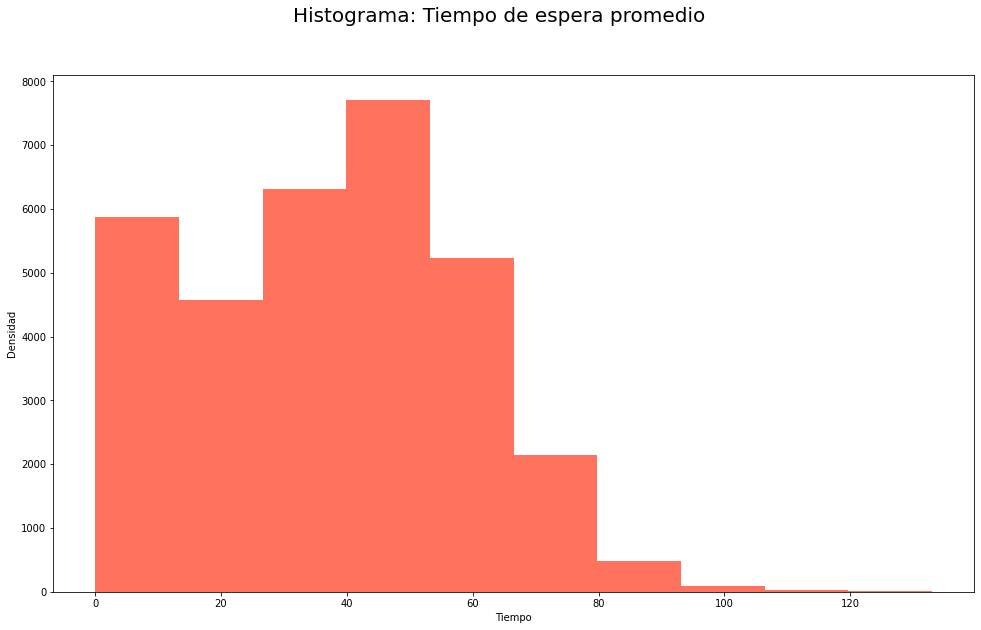

In [5]:
avgWaitTime = []

for guest in park.guests:
    if guest.attractions_experienced == 0:
        continue

    avgWaitTime.append(guest.total_wait_time / guest.attractions_experienced)


print(np.mean(avgWaitTime))
print(st.t.interval(alpha=0.05, df=len(avgWaitTime)-1, loc=np.mean(avgWaitTime), scale=st.sem(avgWaitTime)))
print(len(avgWaitTime))
print(max(avgWaitTime))

fig = figure()
fig.set_size_inches(16.5, 9.5)
hist(avgWaitTime, color="#ff725e");
fig.suptitle('Histograma: Tiempo de espera promedio', fontsize = 20)
xlabel('Tiempo')
ylabel('Densidad')

In [6]:
attr_wait_time = [[attr.name, attr.queue.top_wait_time] for attr in park.attractions]
attr_df = pd.DataFrame(attr_wait_time, columns=["Name", "MaximunWaitTime"])
attr_df

,Name,MaximunWaitTime
0,DINOSAUR,30
1,Expedition Everest,20
2,Flight of Passage,50
3,Kali River Rapids,10
4,Kilimanjaro Safaris,30
5,Na'vi River Journey,40
6,TriceraTop Spin,0


In [7]:
attr_alt_wait_time = [[attr.name, attr.alt_queue.top_wait_time] for attr in park.attractions]
attr_df_alt = pd.DataFrame(attr_alt_wait_time, columns=["Name", "MaximunWaitTime"])
attr_df_alt

,Name,MaximunWaitTime
0,DINOSAUR,0
1,Expedition Everest,0
2,Flight of Passage,0
3,Kali River Rapids,0
4,Kilimanjaro Safaris,0
5,Na'vi River Journey,0
6,TriceraTop Spin,0


In [8]:
[guest for guest in park.guests if guest.attractions_experienced != 0 and guest.attractions_experienced == max(labels)][0].report()



id: 343  arvTime: 19 things_done: ['Flight of Passage', 'DINOSAUR', 'Flight of Passage', 'Kali River Rapids', "Na'vi River Journey", 'Kilimanjaro Safaris', 'DINOSAUR', 'Expedition Everest', 'Expedition Everest', 'Kali River Rapids', "Na'vi River Journey", 'Kilimanjaro Safaris', 'Flight of Passage', 'Expedition Everest', 'Kilimanjaro Safaris', 'Kali River Rapids', 'Kilimanjaro Safaris', 'Kali River Rapids', 'DINOSAUR', "Na'vi River Journey"] attrExp: 20
queues_joined: 20 total_wait_time: 217 archetype: Attraction Enjoyer


In [9]:
[guest for guest in park.guests if guest.attractions_experienced != 0 and guest.total_wait_time / guest.attractions_experienced == max(avgWaitTime)][0].report()

park.attractions[0].queue.max_in_queue


id: 32670  arvTime: 626 things_done: ['DINOSAUR'] attrExp: 1
queues_joined: 2 total_wait_time: 133 archetype: Average


1429

In [10]:
len([guest for guest in park.guests if guest.attractions_experienced == 0])

6295